```
NOTES:
Scaling decision variables to same order of magnitude has the counter-intuitive effect of slowing down convergence, precisely what we had observed in the previous implementation for this problem (example 6).

Perhaps this a problem-specific phenomenon.
```

# 2D planning with three obstacle avoidance

## Problem definition

In [449]:
include("ex8_data.jl");

## Load PIPG tools

In [450]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "execute_utils.jl" true
@load_file "ex8_plotting.jl" false;

## Solve via JuMP

In [451]:
exe_utils.execute_JuMP!(:mosek)

Termination status: OPTIMAL

## Solve via PIPG

In [452]:
exe_utils.execute_PIPG!()

Total PIPG iterations          : 716
Norm of optimum                : 1.912
Distance to optimum (absolute) : 0.08633567763852779
Distance to optimum (relative) : 0.04515464311638483 
Dynamics error                 : 0.0014652081032753145

## Benchmark PIPG

In [453]:
# using BenchmarkTools
exe_utils.execute_pipg_benchmark()

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     12.855 ms (0.00% GC)
  median time:      13.938 ms (0.00% GC)
  mean time:        13.958 ms (0.00% GC)
  maximum time:     21.399 ms (0.00% GC)
  --------------
  samples:          358
  evals/sample:     1

In [454]:
# using TimerOutputs
exe_utils.execute_pipg_timeit()

 ──────────────────────────────────────────────────────────────────
                           Time                   Allocations      
                   ──────────────────────   ───────────────────────
 Tot / % measured:      334ms / 100%             248KiB / 0.00%    

 Section   ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────
 PIPG          20    333ms   100%  16.7ms     0.00B   - %     0.00B
 ──────────────────────────────────────────────────────────────────

## Diagnostic data

Power iteration estimate of σ  : 5.302433550674738
SVD estimate of σ              : 5.3671285416445205

Total PIPG iterations          : 10000
Norm of optimum                : 1.912
Distance to optimum (absolute) : 1.3864688212364418e-5
Distance to optimum (relative) : 7.2514059688098425e-6 
Dynamics error                 : 4.304821693557059e-9

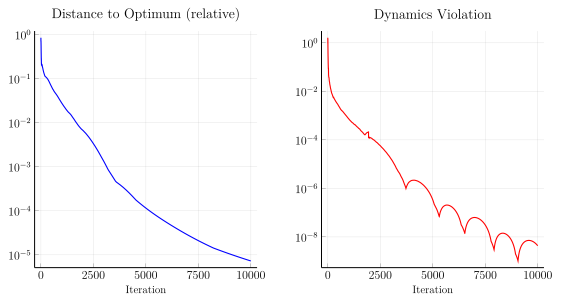

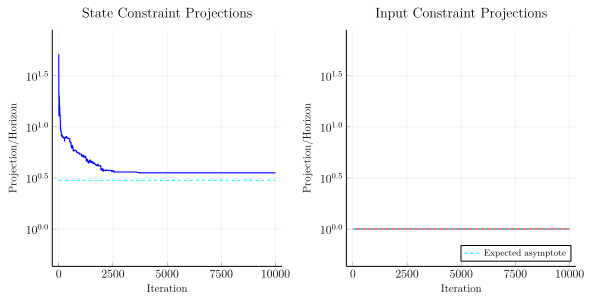

In [455]:
exe_utils.execute_PIPG!(true)

## Visualization

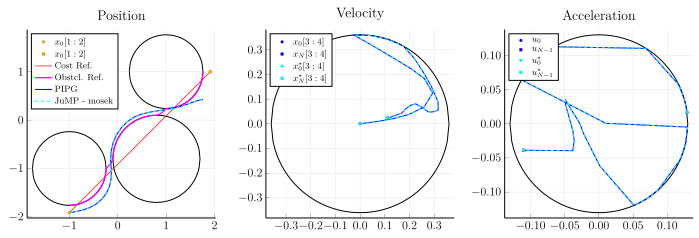

In [458]:
plotter.trajectory2D(iX.x,iX.u,2)